Load appropriate packages, user-defined functions, and the wrangled data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import statsmodels.api as sm
import sklearn as sk
from scipy import stats
from sklearn.preprocessing import scale

In [2]:
def ecdf(data):
  """Compute ECDF for a one-dimensional array of measurements."""
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  
  return x, y

# call function as follows: x, y = ecdf(data)

In [3]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [4]:
data = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/wrangled_data.csv')

In [5]:
data.head()

,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
0,1990,139.0,75.0,111.0,50.44,54.4,3031.0,0.760834,0.0,39.011486,5450.0,3.306718,129
1,1991,135.0,78.0,112.0,37.56,54.8,3610.0,0.678371,0.0,26.224166,5550.0,3.508214,92
2,1992,143.0,66.0,107.0,44.22,52.6,2817.0,0.620331,0.0,43.539021,5970.0,3.376282,147
3,1993,134.0,68.0,114.0,50.78,52.0,3079.0,0.491073,0.0,46.144325,5400.0,2.860590,132
4,1994,147.0,74.0,112.0,31.63,53.3,3023.0,0.552628,0.0,43.221141,5960.0,3.331703,144


Explore the chracteristics of the dataframe.

In [6]:
data.describe()

,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2003.500000,150.178571,70.642857,118.428571,43.675357,53.675000,3225.250000,0.483766,0.014607,47.454553,5610.714286,3.116060,145.500000
std,8.225975,10.828815,5.056820,7.828857,6.878933,1.580582,206.801681,0.109902,0.030283,10.574777,263.578347,0.283193,23.652578
min,1990.000000,132.000000,56.000000,107.000000,31.630000,50.000000,2817.000000,0.246606,0.000000,25.075985,5200.000000,2.753550,92.000000
25%,1996.750000,145.250000,68.000000,112.000000,37.920000,52.600000,3081.250000,0.406669,0.000000,39.884948,5450.000000,2.874357,131.250000
50%,2003.500000,148.000000,72.000000,118.500000,45.075000,53.800000,3230.000000,0.502845,0.000000,46.024094,5550.000000,3.082704,146.500000
75%,2010.250000,156.250000,74.000000,124.250000,48.920000,54.650000,3359.000000,0.544114,0.004183,56.891294,5755.000000,3.334086,157.750000
max,2017.000000,178.000000,79.000000,138.000000,56.850000,56.800000,3610.000000,0.760834,0.094673,68.275487,6370.000000,3.948000,188.000000


In [32]:
datadata.efficiency < 39.88

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
Name: efficiency, dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 28 non-null     int64  
 1   nitrogen             28 non-null     float64
 2   phosphate            28 non-null     float64
 3   potash               28 non-null     float64
 4   precipitation        28 non-null     float64
 5   average_temperature  28 non-null     float64
 6   accumulated_gdd      28 non-null     float64
 7   full_till_ratio      28 non-null     float64
 8   cover_crop_ratio     28 non-null     float64
 9   efficiency           28 non-null     float64
 10  total_acres          28 non-null     float64
 11  emissions            28 non-null     float64
 12  yield                28 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 3.0 KB


In [8]:
data.shape

(28, 13)

Separate and explore the key metrics of the data, emissions and efficiency. emissions do not appear to be normally distributed, on the other hand efficiency does appear normally distributed.

In [9]:
emissions = np.array(data.emissions)

In [10]:
efficiency = np.array(data.efficiency)

In [11]:
np.mean(emissions)

3.1160601717857146

In [12]:
np.median(emissions)

3.0827036000000003

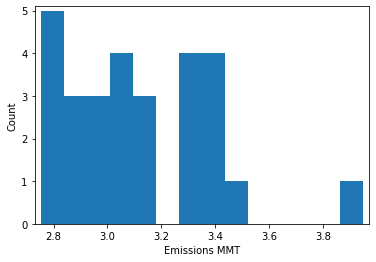

In [13]:
_ = plt.hist(emissions, bins=14)
_ = plt.margins(.02)
_ = plt.xlabel('Emissions MMT')
_ = plt.ylabel('Count')

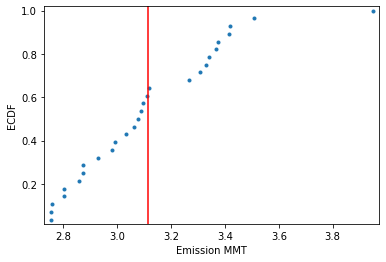

In [14]:
x, y = ecdf(emissions)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(.02)
_ = plt.xlabel('Emission MMT')
_ = plt.ylabel('ECDF')
_ = plt.axvline(np.mean(emissions), color='red')

In [15]:
np.mean(efficiency)

47.45455300796551

In [16]:
np.median(efficiency)

46.024093667296405

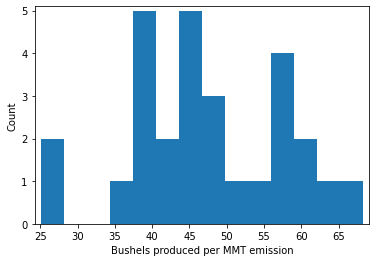

In [17]:
_ = plt.hist(efficiency, bins=14)
_ = plt.margins(.02)
_ = plt.xlabel('Bushels produced per MMT emission')
_ = plt.ylabel('Count')

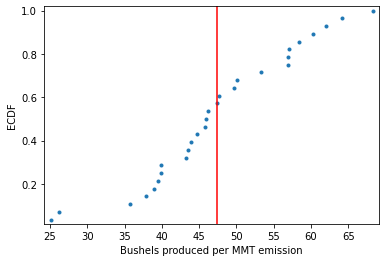

In [18]:
x, y = ecdf(efficiency)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(.02)
_ = plt.xlabel('Bushels produced per MMT emission')
_ = plt.ylabel('ECDF')
_ = plt.axvline(np.mean(efficiency), color='red')

Explore the correlations between the key metrics and the rest of the features in the dataframe.

In [19]:
correlation = data.corr()
print(correlation.iloc[-4, :])

year                   0.595785
nitrogen               0.338882
phosphate              0.043374
potash                 0.153312
precipitation          0.401003
average_temperature   -0.234503
accumulated_gdd       -0.133062
full_till_ratio       -0.532076
cover_crop_ratio       0.464143
efficiency             1.000000
total_acres           -0.208276
emissions             -0.821139
yield                  0.955375
Name: efficiency, dtype: float64


In [20]:
print(correlation.iloc[-2, :])

year                  -0.264507
nitrogen               0.068683
phosphate              0.077355
potash                -0.057107
precipitation         -0.524160
average_temperature    0.353688
accumulated_gdd        0.193183
full_till_ratio        0.356156
cover_crop_ratio      -0.275446
efficiency            -0.821139
total_acres            0.605570
emissions              1.000000
yield                 -0.639623
Name: emissions, dtype: float64


In [21]:
print(correlation.iloc[-1, :])

year                   0.632368
nitrogen               0.482612
phosphate              0.052022
potash                 0.171212
precipitation          0.287771
average_temperature   -0.175403
accumulated_gdd       -0.085839
full_till_ratio       -0.521562
cover_crop_ratio       0.450716
efficiency             0.955375
total_acres            0.018773
emissions             -0.639623
yield                  1.000000
Name: yield, dtype: float64


<Figure size 7200x7200 with 0 Axes>

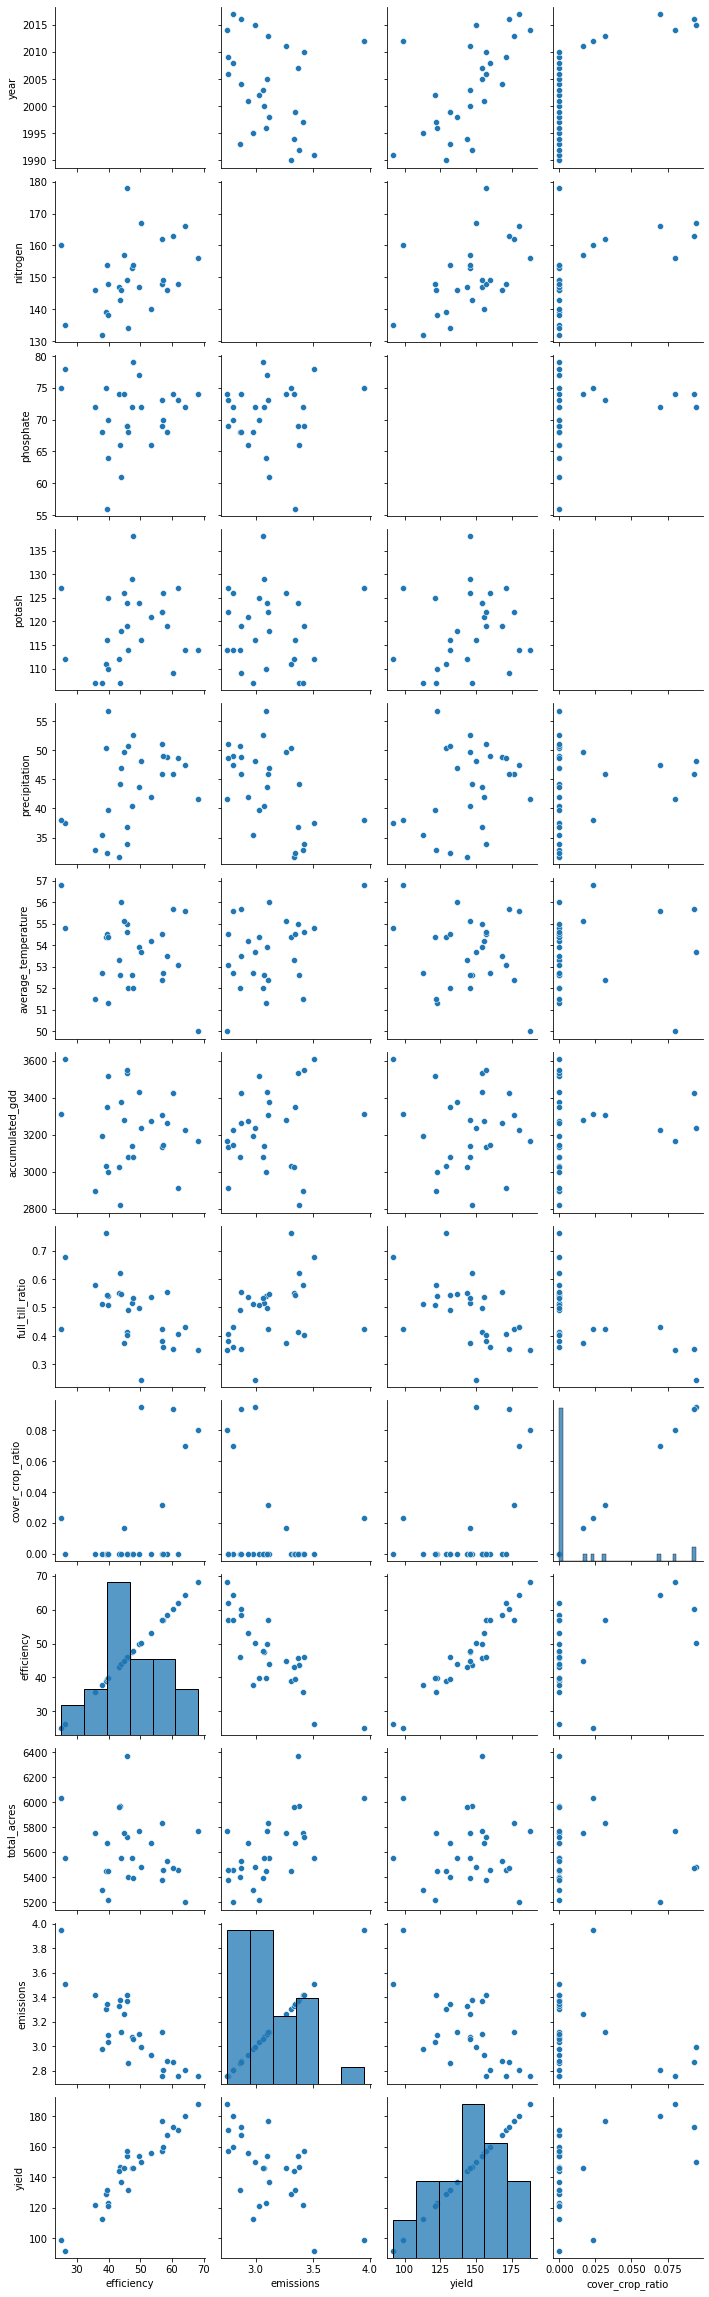

In [22]:
plt.figure(figsize=(100,100))
sns.pairplot(data, x_vars=['efficiency', 'emissions', 'yield', 'cover_crop_ratio'])
plt.show()

<AxesSubplot:>

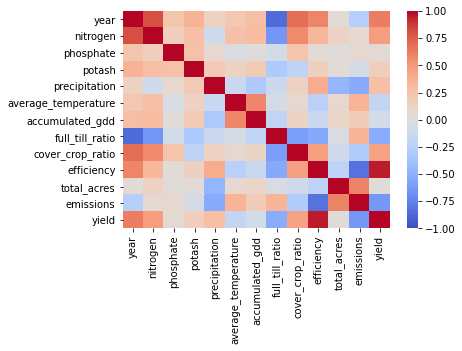

In [23]:
heatmap = sns.heatmap(correlation, vmin=-1, cmap='coolwarm')
heatmap

Explore the features using boxplots to identify any potential outliers between years with cover crop data and without.

In [24]:
data['cover_crop_dummy'] = data.cover_crop_ratio != 0

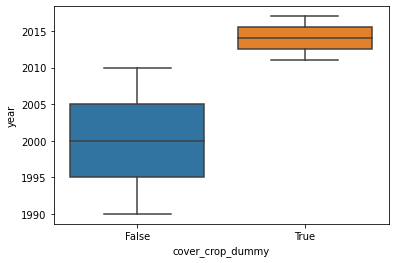

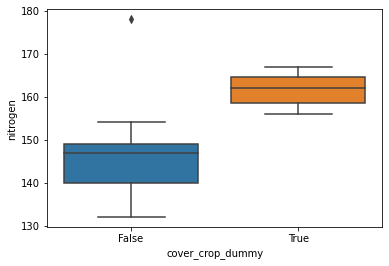

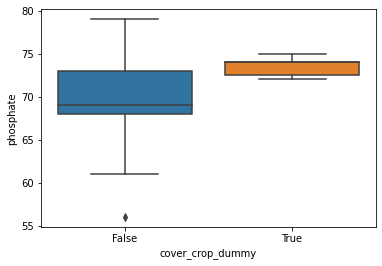

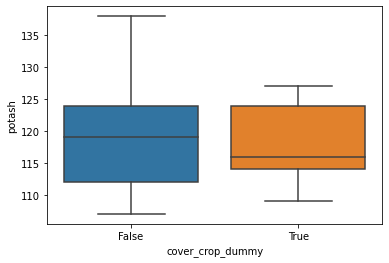

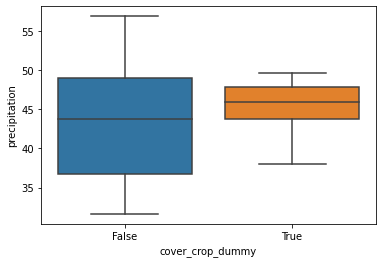

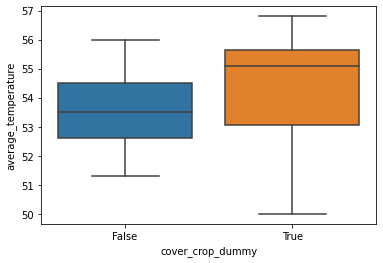

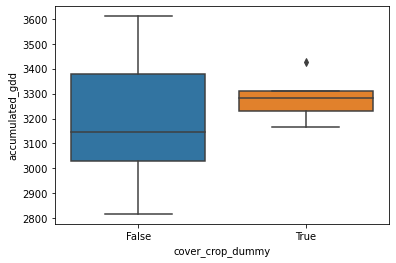

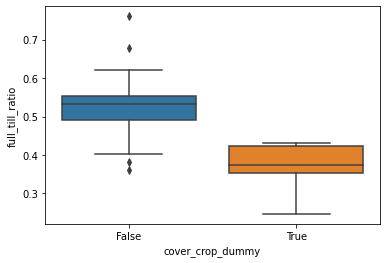

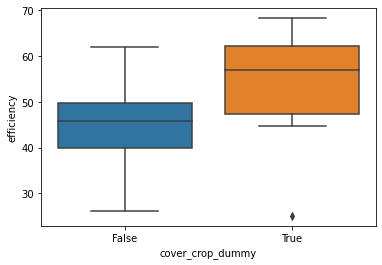

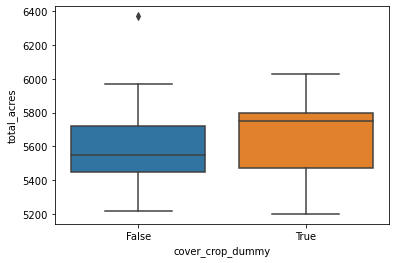

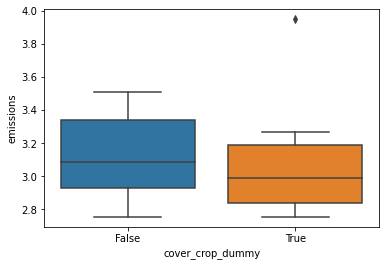

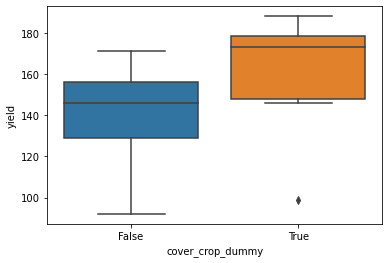

In [25]:
for col in data.columns:
    if col == 'cover_crop_dummy' or col == 'cover_crop_ratio':
        continue
    fig, axs = plt.subplots(nrows=1, ncols=1)
    sns.boxplot(x=data['cover_crop_dummy'], y=data[col])

Simple regression analysis, the wrangled data in its most basic form does appear to explain some of the variance from year to year in efficiency.

In [26]:
columns = list(data.columns)
dependent = columns.pop(-4)

In [27]:
independents = columns
independents.pop(-1)
independents.pop(-1)

'yield'

In [28]:
y = data[dependent]
X = data[independents]

In [29]:
lm = sk.linear_model.LinearRegression()
model = lm.fit(X,y)

In [30]:
lm.score(X,y)

0.9561148661168088

In [31]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_acres   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     31.69
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           9.32e-09
Time:                        01:09:51   Log-Likelihood:                -151.54
No. Observations:                  28   AIC:                             327.1
Df Residuals:                      16   BIC:                             343.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.333e+04   1.29e+04      3.357      0.004     1.6e+04    7.07e+04
year                  -21.3319      6.787     -3.143      0.006     -35.719      -6.945
nitrogen              -19.0755      2.736     -6.972      0.000     -24.876     -13.275
phosphate              -5.2357      3.451     -1.517      0.149     -12.552       2.081
potash                  5.4164      3.104      1.745      0.100      -1.164      11.997
precipitation          -2.4397      2.793     -0.874      0.395      -8.360       3.481
average_temperature   -25.5771     12.490     -2.048      0.057     -52.055       0.901
accumulated_gdd         0.2641      0.097      2.721      0.015       0.058       0.470
full_till_ratio     -1870.7526    307.131     -6.091      0.000   -2521.840   -1219.665
cover_crop_ratio     1369.2697   1013.773      1.351      0.196    -779.833    3518.372
efficiency             47.5559      3.984     11.936      0.000      39.110      56.002
emissions            2204.8587    140.407     15.703      0.000    1907.210    2502.507
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.222
Skew:                          -0.048   Prob(JB):                        0.895
Kurtosis:                       2.574   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""